In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
ConsumerKey = "5Rhf7GTCvDUVqfOAE6G7zh2T3"
ConsumerSecret = "E7jKCkzyF6my0j7VxMYNyLMHyVyxz8H7MJjz4Z6stutaPgZUiS"
AccessToken = "1052018922357047296-r6JApBX81nkMBGje7OCsgu4v3x23uc"
AccessTokenSecret = "fQxVMl8QL9fIQLfyPT92TjTac6dJ4AqkVRj344anBTLWe"

In [3]:
auth = tweepy.OAuthHandler(ConsumerKey, ConsumerSecret)
auth.set_access_token(AccessToken,AccessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [4]:
posts = api.user_timeline(screen_name="AlibabaGroup", count = 1000, lang = "en", tweet_mode = "extended")

# Print the last 5 tweets
print("Show the 5 recent:\n")
i=1
for tweet in posts[:5]:
  print(str(i)+') '+tweet.full_text +'\n')
  i = i+1

Show the 5 recent:

1) This week, Alibaba Group hosted its annual Investor Day that revealed more than 350 million users are now active on the company’s local services platform. Click to learn more about what happened in and around Alibaba's ecosystem this week.

https://t.co/T9sM8wDPsk

2) Read about it: Key takeaways from Alibaba's 2021 Investor Day on Taobao Deals, Taocaicai, Local Services and More.

#InvestorDay #LocalServices #TaobaoDeals #Taocaicai

https://t.co/9aCrKeeF3I

3) This week, Alibaba Group revealed organizational and leadership changes, including news that Toby Xu will succeed Maggie Wu as Chief Financial Officer. Find out more about what happened in and around the Alibaba ecosystem this week. 

https://t.co/YnqDIwhZcn

4) China’s concrete jungle dwellers are embracing glamping, and brands from @Prada and @Fendi to @Kleankanteen have gotten the message.

#Camping #Glamping #Trends #China #Ecommerce #Retail #Outdoors

https://t.co/MzcZIyQ8mo

5) As consumers in China 

In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
#Show the first 10 of Data
df.head() 

,Tweets
0,"This week, Alibaba Group hosted its annual Inv..."
1,Read about it: Key takeaways from Alibaba's 20...
2,"This week, Alibaba Group revealed organization..."
3,China’s concrete jungle dwellers are embracing...
4,As consumers in China unpack their Black Frida...


In [6]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removing Text and Number
  text = re.sub(r'#','', text) #removing Hastag
  text = re.sub(r'RT[\s]+','', text) #removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #removing hyperlink

  return text

df['Tweets']=df['Tweets'].apply(cleanTxt)
df

,Tweets
0,"This week, Alibaba Group hosted its annual Inv..."
1,Read about it: Key takeaways from Alibaba's 20...
2,"This week, Alibaba Group revealed organization..."
3,China’s concrete jungle dwellers are embracing...
4,As consumers in China unpack their Black Frida...
...,...
195,Today is the last day to sign up for the UK &a...
196,: Check our latest article Alibaba Group’s Tma...
197,The dual opportunity to do business in the wor...
198,Alibaba Netpreneur Masterclass is heading to F...


In [7]:
# Create a function to get subjeectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns 'Subjectiviy' & 'Polarity'
df['Subjectiviy'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectiviy,Polarity
0,"This week, Alibaba Group hosted its annual Inv...",0.400000,0.216667
1,Read about it: Key takeaways from Alibaba's 20...,0.500000,0.166667
2,"This week, Alibaba Group revealed organization...",0.250000,0.250000
3,China’s concrete jungle dwellers are embracing...,0.300000,0.150000
4,As consumers in China unpack their Black Frida...,0.144444,-0.055556
...,...,...,...
195,Today is the last day to sign up for the UK &a...,0.138095,0.035714
196,: Check our latest article Alibaba Group’s Tma...,0.300000,0.166667
197,The dual opportunity to do business in the wor...,1.000000,0.000000
198,Alibaba Netpreneur Masterclass is heading to F...,0.340909,0.177273


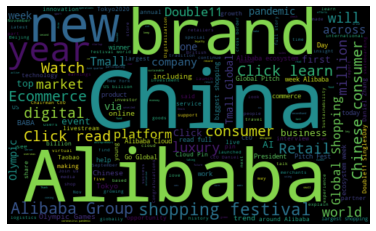

In [8]:
#word cloud visualization

allWords = ''.join([twts for twts in df['Tweets']])
WordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
#create a function to compute negative (-1) neutral (0) and positive (+1) analysis

def getAnalysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectiviy,Polarity,Analysis
0,"This week, Alibaba Group hosted its annual Inv...",0.400000,0.216667,positive
1,Read about it: Key takeaways from Alibaba's 20...,0.500000,0.166667,positive
2,"This week, Alibaba Group revealed organization...",0.250000,0.250000,positive
3,China’s concrete jungle dwellers are embracing...,0.300000,0.150000,positive
4,As consumers in China unpack their Black Frida...,0.144444,-0.055556,negative
...,...,...,...,...
195,Today is the last day to sign up for the UK &a...,0.138095,0.035714,positive
196,: Check our latest article Alibaba Group’s Tma...,0.300000,0.166667,positive
197,The dual opportunity to do business in the wor...,1.000000,0.000000,neutral
198,Alibaba Netpreneur Masterclass is heading to F...,0.340909,0.177273,positive


In [10]:
print('Negative tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'negative'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Negative tweets:

1) As consumers in China unpack their Black Friday and Cyber Monday deals, we dug into insights gleaned from across the digital ecosystem that retailers should watch next year. CrossborderRetail Ecommerce Retail


2) $BABA reports September Quarter 2021 Results: Alibaba continued to move firmly on our strategy of making new investments into our three strategic pillars that will establish solid foundations for our long-term goal of sustainable growth in the future.  

3) Want to see how a Taobao livestream actually works? Go behind the scenes of a livestream at the  flagship store in New York.

Double11 SinglesDay Livestream LivestreamCommerce Ecommerce 

4) As we count down to the start of 11.11, some of our US partner brands share their activations around the biggest shopping festival in the world. 

5) How do small brands sell to Chinese consumers without having to make a big investment in an on-the-ground presence? Alibaba Group’s solution is the Tmall Overseas Ful

In [11]:
print('Positive tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'positive'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Positive tweets:

1) This week, Alibaba Group hosted its annual Investor Day that revealed more than 350 million users are now active on the company’s local services platform. Click to learn more about what happened in and around Alibaba's ecosystem this week.



2) Read about it: Key takeaways from Alibaba's 2021 Investor Day on Taobao Deals, Taocaicai, Local Services and More.

InvestorDay LocalServices TaobaoDeals Taocaicai



3) This week, Alibaba Group revealed organizational and leadership changes, including news that Toby Xu will succeed Maggie Wu as Chief Financial Officer. Find out more about what happened in and around the Alibaba ecosystem this week. 



4) China’s concrete jungle dwellers are embracing glamping, and brands from  and  to  have gotten the message.

Camping Glamping Trends China Ecommerce Retail Outdoors



5) Click to learn how California-based sustainable drinkware brand  stayed one step ahead of potential supply-chain issues during China’s busy fall and win

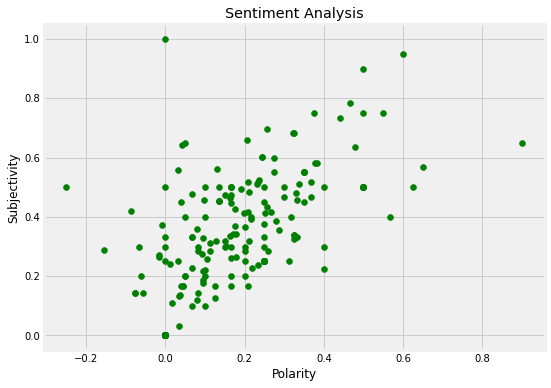

In [12]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectiviy'][i], color='green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [13]:
#persentasepositiv

potweets = df[df.Analysis == 'positive']
potweets = potweets['Tweets']

round ( (potweets.shape[0] / df.shape[0]) *100, 1)

79.0

In [14]:
#persentasenegatif

netweets = df[df.Analysis == 'negative']
netweets = netweets['Tweets']

round ( (netweets.shape[0] / df.shape[0]) *100, 1)

5.5

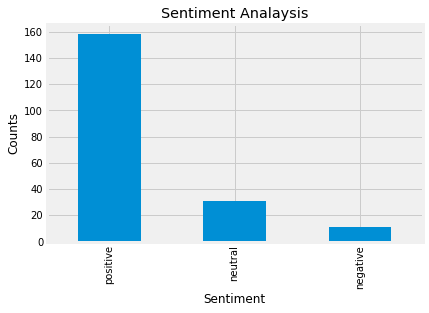

In [15]:
#show value count

df['Analysis'].value_counts()

plt.title('Sentiment Analaysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()